# Case Study on Measures of Central Tendency and Dispersion


An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.

1. Find out how many males and females participated in the test.

2. What do you think about the students' parental level of education?

3. Who scores the most on average for math, reading and writing based on

● Gender

● Test preparation course

4. What do you think about the scoring variation for math, reading and writing
based on

● Gender

● Test preparation course

5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rd=pd.read_csv(r"C:\Users\USER\Downloads\StudentsPerformance.csv")
rd

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. Find out how many males and females participated in the test.

In [4]:
fm=rd['gender'].value_counts()
fm

female    518
male      482
Name: gender, dtype: int64

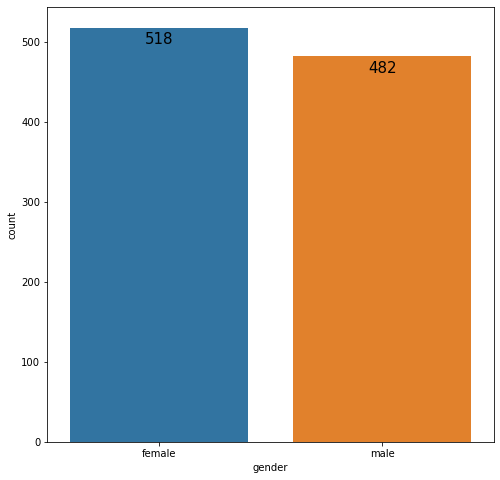

In [5]:
plt.figure(figsize=(8,8))
splot=sns.countplot(x=rd['gender'],data=rd)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Number of females participated in the test is 7.4% higher than males.



# 2. What do you think about the students' parental level of education?

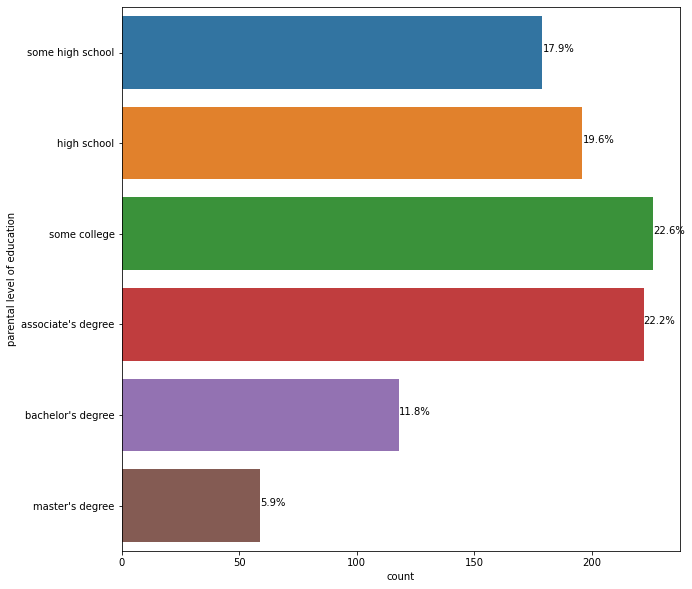

In [6]:
plt.figure(figsize=(10,10))
pt=sns.countplot(y=rd['parental level of education'])
total = len(rd['parental level of education'])
for p in pt.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        pt.annotate(percentage, (x, y))

22.6% of parents have college level of education while 22.2% have associate's degree.

Only 5.9% have Master's degree.

In [27]:
rd['average_score'] = (rd['math score'] + rd['writing score'] + rd['reading score']) / 3

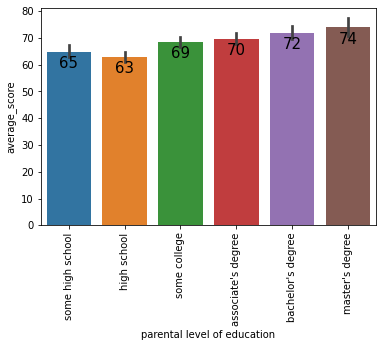

In [41]:
ple=sns.barplot(x=rd['parental level of education'],y=rd['average_score'])
plt.xticks(rotation=90)
for p in ple.patches:
    ple.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

#The average score on math,reading and writing is high for students whose parents have master's degree.
#low for the ones with parents's education level is high school.

This shows how the education level of parents affect the student's performance in the exam.

# 3. Who scores the most on average for math, reading and writing based on



# ● Gender

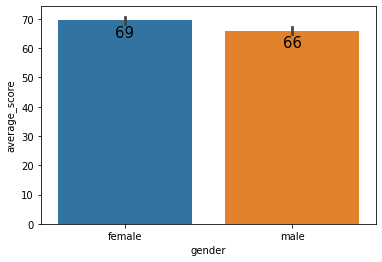

In [7]:

pn=sns.barplot(x=rd['gender'],y=rd['average_score'])
for p in pn.patches:
    pn.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')


Females score the most on average of math,reading and writing .

In [111]:
mn5=rd.groupby('gender')[['math score','reading score','writing score']].mean()
mn5


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


The males have outdone females only in math where in others,females lead.

# ● Test preparation course

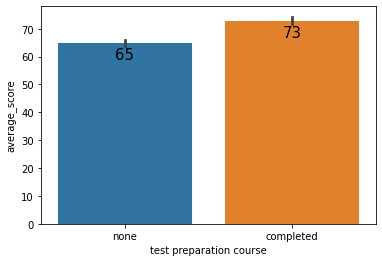

In [77]:
xn=sns.barplot(x=rd['test preparation course'],y=rd['average_score'])
for p in xn.patches:
    xn.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

 The students who completed test preparation course scored 12.3% higher on average of math,reading and writing than those who didn't.

# 4.What do you think about the scoring variation for math, reading and writing based on

# ● Gender

In [42]:
sd4=rd.groupby('gender')[['math score','reading score','writing score']].std()
mn4=rd.groupby('gender')[['math score','reading score','writing score']].mean()
cv4=sd4/mn4
cv4


,math score,reading score,writing score
gender,,,
female,0.252932,0.198524,0.204849
male,0.211509,0.215874,0.224241


Variation in math,reading and writing scores is low for both males and females.

# ● Test preparation course

In [11]:
sd5=rd.groupby('test preparation course')[['math score','reading score','writing score']].std()
mn5=rd.groupby('test preparation course')[['math score','reading score','writing score']].mean()
cv5=sd5/mn5
cv5

,math score,reading score,writing score
test preparation course,,,
completed,0.207554,0.182506,0.177231
none,0.246210,0.219956,0.233356


Variation in math, reading and writing scores is a little lower for students who completed test preparation course.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [12]:
bp=rd['math score'].sort_values(ascending=False).head(250)
bp

999    100
996    100
515    100
517    100
516    100
      ... 
856     77
855     77
854     77
853     77
852     77
Name: math score, Length: 250, dtype: int64

In [13]:
#Giving 10 marks as bonus
bp+10

999    110
996    110
515    110
517    110
516    110
      ... 
856     87
855     87
854     87
853     87
852     87
Name: math score, Length: 250, dtype: int64